In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import datetime
import seaborn as sns
sns.set(color_codes=True)
import geopandas as gp
from scipy import stats, integrate

In [14]:
herepath = pd.read_csv('data/MOW_Path_Speed_5Min_2014_DOWavailable.csv', encoding='utf-8')
herepath.head()

,Unnamed: 0,LINK_DIR,DATE_TIME,EPOCH_5MIN,LENGTH,MEAN,STDDEV,CONFIDENCE,DOW
0,0,998969850F,2014-01-01 13:55,167,186,61.0,0.0,10,Wednesday
1,1,998969850F,2014-01-02 11:05,133,186,60.0,0.0,10,Thursday
2,2,998969850F,2014-01-02 13:20,160,186,61.0,0.0,10,Thursday
3,3,998969850F,2014-01-02 14:30,174,186,52.0,0.0,10,Thursday
4,4,998969850F,2014-01-03 09:05,109,186,57.0,0.0,10,Friday


In [9]:
#For now, enter the weekdays desire here in full
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Weekday

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [10]:
Weekend = ['Saturday','Sunday']
Weekend

['Saturday', 'Sunday']

In [11]:
Both = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Both

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [7]:
#w = Link, x = input dataframe, y = beginning timeframe (in epoch), z = ending timeframe (in epoch), 
#h = holiday (y or n), d = weekend or weekday
#Note the dataframe has to have an EPOCH_5MIN row to work.
#Also, this is ONLY for a single-link dataframe
def timeframe(w,x,y,z,h,d):
    us_holidays = ['2014-01-01', '2014-05-26', 
                   '2014-07-04', '2014-09-01', '2014-11-27', 
                   '2014-11-28', '2014-12-25']
    if h == True:
        x['DATE'] = x['DATE_TIME'].str.split(' ').str[0]
        r = x[x['DATE'].isin(us_holidays)]
        v = x[~x.isin(r)].dropna()
        link = v[v['LINK_DIR']== w]
        days = link[link['DOW'].isin(d)]
        Timeframe = days[(days['EPOCH_5MIN'] >= y) & (days['EPOCH_5MIN'] <= z)]
        return Timeframe
    else:
        link = x[x['LINK_DIR']== w]
        days = link[link['DOW'].isin(d)]
        Timeframe = days[(days['EPOCH_5MIN'] >= y) & (days['EPOCH_5MIN'] <= z)]
        return Timeframe

In [18]:
data = timeframe('998969850F',herepath,0,288,True,Weekend)
data.head()

,Unnamed: 0,LINK_DIR,DATE_TIME,EPOCH_5MIN,LENGTH,MEAN,STDDEV,CONFIDENCE,DOW,DATE
10,10.0,998969850F,2014-01-04 11:20,136.0,186.0,46.0,0.0,10.0,Saturday,2014-01-04
11,11.0,998969850F,2014-01-04 14:30,174.0,186.0,43.0,0.0,10.0,Saturday,2014-01-04
12,12.0,998969850F,2014-01-04 17:30,210.0,186.0,54.0,0.0,10.0,Saturday,2014-01-04
13,13.0,998969850F,2014-01-05 17:10,206.0,186.0,57.0,0.0,10.0,Sunday,2014-01-05
50,50.0,998969850F,2014-01-11 14:15,171.0,186.0,62.0,0.0,10.0,Saturday,2014-01-11


In [6]:
#ddof represents degrees of freedom which, according to the documentation for HERE, is 1
#85th percentile speed uses a linear interpolation.  The lowest, highest, or nearest can also be selected
def HEREstats(x):
    print('Mean is ', x['MEAN'].mean(), 'KMH')
    print('Standard Deviation is ', x['MEAN'].std(ddof=1),'KMH')
    print('85th percentile speed is ', x['MEAN'].quantile(0.85), 'KMH')
    print('5th percentile speed is ', x['MEAN'].quantile(0.05), 'KMH')
    
    ax = sns.distplot(x['MEAN'], kde=False, bins=70)
    ax.figure.set_size_inches(8,6)
    ax.set_xlim(0,100)
    return ax

Mean is  55.407253254036526 KMH
Standard Deviation is  18.50712043537633 KMH
85th percentile speed is  74.0 KMH
5th percentile speed is  23.0 KMH


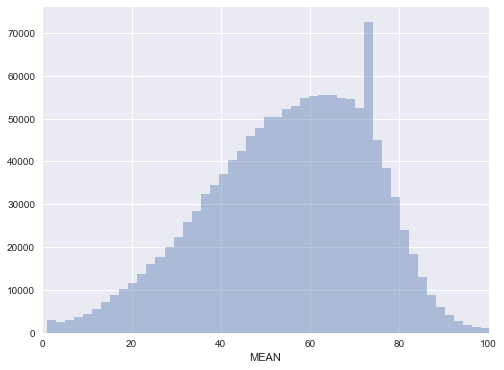

In [15]:
#For all days and all time periods
HEREstats(herepath)

Mean is  54.66605930689531 KMH
Standard Deviation is  14.820681264711256 KMH
85th percentile speed is  69.0 KMH
5th percentile speed is  29.0 KMH


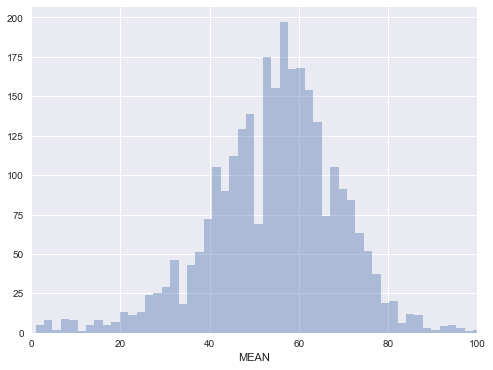

In [12]:
#for weekdays
Wkd = timeframe('998969850F',herepath,0,288,True,Weekday)
HEREstats(Wkd)

Mean is  58.26878787878788 KMH
Standard Deviation is  17.247989928713647 KMH
85th percentile speed is  75.0 KMH
5th percentile speed is  28.45 KMH


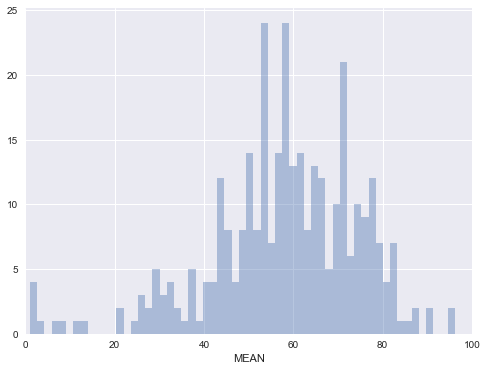

In [50]:
#for weekends
Wend = timeframe('998969850F',herepath,0,288,True,Weekend)
HEREstats(Wend)

Mean is  53.58534982605336 KMH
Standard Deviation is  14.36557141958837 KMH
85th percentile speed is  67.0 KMH
5th percentile speed is  29.0 KMH


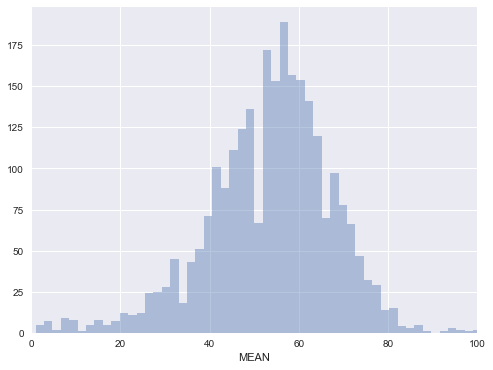

In [51]:
#Weekday Between 6AM and 8PM
Wdtime = timeframe('998969850F',herepath,72,240,True,Weekday)
HEREstats(Wdtime)

Mean is  54.4625 KMH
Standard Deviation is  13.981716930132398 KMH
85th percentile speed is  68.0 KMH
5th percentile speed is  29.950000000000003 KMH


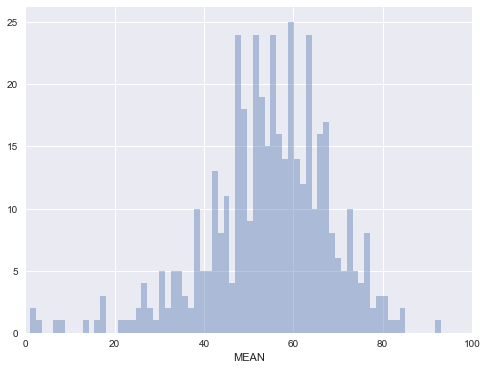

In [52]:
#Stats between 6AM and 9AM
WdtimeAM = timeframe('998969850F',herepath,72,108,True,Weekday)
HEREstats(WdtimeAM)

Mean is  54.747110460863205 KMH
Standard Deviation is  13.918146146556158 KMH
85th percentile speed is  68.0 KMH
5th percentile speed is  30.299999999999997 KMH


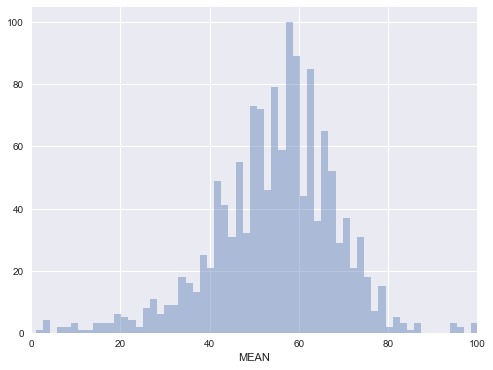

In [53]:
#Stats between 9AM and 3PM
WdtimeMD = timeframe('998969850F',herepath,108,180,True,Weekday)
HEREstats(WdtimeMD)

Mean is  50.929032258064524 KMH
Standard Deviation is  14.994376447923225 KMH
85th percentile speed is  65.0 KMH
5th percentile speed is  27.0 KMH


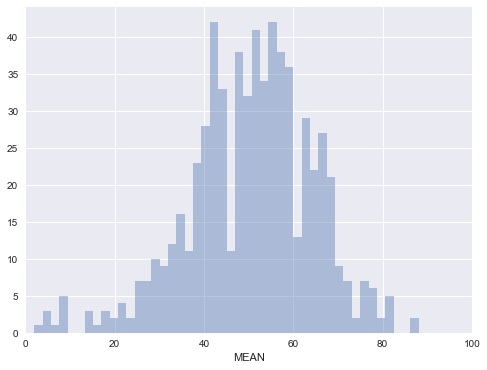

In [54]:
#Stats between 3PM and 6PM
WdtimePM = timeframe('998969850F',herepath,180,216,True,Weekday)
HEREstats(WdtimePM)